In [118]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
file_path = '/content/drive/MyDrive/Resume.csv'


In [120]:
import pandas as pd
import sklearn
import numpy as np

df = pd.read_csv(file_path)


In [121]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [122]:
df['Resume_html'][1]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME911808366" style="padding-top:0px;"> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_911808366_1_598530989" style="padding-top:0px;"> <div class="name thinbottomborder" itemprop="name"> <span class="field fName" id="911808366FNAM1"> </span> <span> </span> <span class="field" id="911808366LNAM1"> HR SPECIALIST, US HR OPERATIONS</span> </div> </div> </div> <div class="section" id="SECTION_SUMM911808372" style="padding-top:0px;"> <div class="heading"> <div class="sectiontitle" id="SECTNAME_SUMM911808372"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_911808372_1_598532134" style="padding-top:0px;"> <div class="field singlecolumn noPind" id="911808372FRFM1"> <span class=""> Versatile <font color="#000" style="color: rgb(0, 0, 0);"> media professional with background in Communications, Marketing, Human Resources

In [123]:
df['Resume_str'][1]

"         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.\xa0        Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully r

In [124]:
df = df.drop('Resume_html',axis=1)

In [125]:
df

,ID,Resume_str,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR
...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [126]:
df.head(25)

,ID,Resume_str,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR
5,11592605,HR GENERALIST Summary Dedic...,HR
6,25824789,HR MANAGER Summary HUMAN RES...,HR
7,15375009,HR MANAGER Professional Summa...,HR
8,11847784,HR SPECIALIST Summary Posses...,HR
9,32896934,HR CLERK Summary Translates ...,HR


In [127]:
# cleanig the data[removing the unnecessary fields form the data]
import re
def clean(text):
  text = text.replace('\xa0',' ')
  text = text.replace('\n\n',' ')
  text = text.replace('.',' ')
  text = text.replace('-',' ' )
  text = text.replace(':',' ')
  text = text.replace('/',' ')
  text = text.replace('－',' ')

  #removing extra spaces
  text = re.sub(r'\s+', ' ', text).strip()

  return text.strip().lower()

df['Resume_str'] = df['Resume_str'].apply(clean)

In [128]:
df['Resume_str'][0]

"hr administrator marketing associate hr administrator summary dedicated customer service manager with 15+ years of experience in hospitality and customer service management respected builder and leader of customer focused teams; strives to instill a shared, enthusiastic commitment to customer service highlights focused on customer satisfaction team management marketing savvy conflict resolution techniques training and development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified by ihg in customer loyalty and marketing by segment hilton worldwide general manager training certification accomplished trainer for cross server hospitality systems such as hilton onq , micros opera pms , fidelio opera reservation system (ors) , holidex completed courses and seminars in customer service, sales strategies, inventory control, loss prevention, safety, time management, leadership and performance assessment experience hr admin

In [129]:
df

,ID,Resume_str,Category
0,16852973,hr administrator marketing associate hr admini...,HR
1,22323967,"hr specialist, us hr operations summary versat...",HR
2,33176873,hr director summary over 20 years experience i...,HR
3,27018550,"hr specialist summary dedicated, driven, and d...",HR
4,17812897,hr manager skill highlights hr skills hr depar...,HR
...,...,...,...
2479,99416532,rank sgt e 5 non commissioned officer in charg...,AVIATION
2480,24589765,"government relations, communications and organ...",AVIATION
2481,31605080,geek squad agent professional profile it suppo...,AVIATION
2482,21190805,program director office manager summary highly...,AVIATION


In [130]:
#converting the contents of column category to lower case
df['Category'] = df['Category'].str.lower()

In [131]:
#checking if there are any null values
print(df.isnull().sum())

ID            0
Resume_str    0
Category      0
dtype: int64


In [132]:
print(df['Category'].value_counts())


Category
information-technology    120
business-development      120
advocate                  118
chef                      118
engineering               118
accountant                118
finance                   118
fitness                   117
aviation                  117
sales                     116
banking                   115
healthcare                115
consultant                115
construction              112
public-relations          111
hr                        110
designer                  107
arts                      103
teacher                   102
apparel                    97
digital-media              96
agriculture                63
automobile                 36
bpo                        22
Name: count, dtype: int64


Step 1: Converting text into numbers.
WHY?
Because ML models cant understand text directly so we need to convert it into numerical form

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

#features (resume text) and labels (encoded category)
X = df['Resume_str']
y = df['Category_encoded']

#split into trainig and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y
)

In [134]:
# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Only transform the test set (don't fit, just transform)
X_test_tfidf = tfidf.transform(X_test)

# Print the shapes of the transformed data
print(f"Transformed training data shape: {X_train_tfidf.shape}")
print(f"Transformed test data shape: {X_test_tfidf.shape}")


Transformed training data shape: (1987, 5000)
Transformed test data shape: (497, 5000)


In [135]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

#train the model according to the training data
model.fit(X_train_tfidf, y_train)
print('Training accuracy: ', model.score(X_train_tfidf, y_train))

#predict the labels for the test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
acc = model.score(X_test_tfidf, y_test)
print('Test Accuracy:', acc)

#detailed report
print(classification_report(y_test, y_pred, target_names= label_encoder.classes_))


Training accuracy:  0.8183190739808757
Test Accuracy: 0.6498993963782697
                        precision    recall  f1-score   support

            accountant       0.67      0.83      0.74        24
              advocate       0.35      0.54      0.43        24
           agriculture       1.00      0.46      0.63        13
               apparel       0.67      0.21      0.32        19
                  arts       0.46      0.29      0.35        21
            automobile       0.00      0.00      0.00         7
              aviation       0.85      0.71      0.77        24
               banking       0.83      0.65      0.73        23
                   bpo       0.00      0.00      0.00         4
  business-development       0.46      0.79      0.58        24
                  chef       0.81      0.71      0.76        24
          construction       0.78      0.82      0.80        22
            consultant       0.44      0.17      0.25        23
              designer       0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


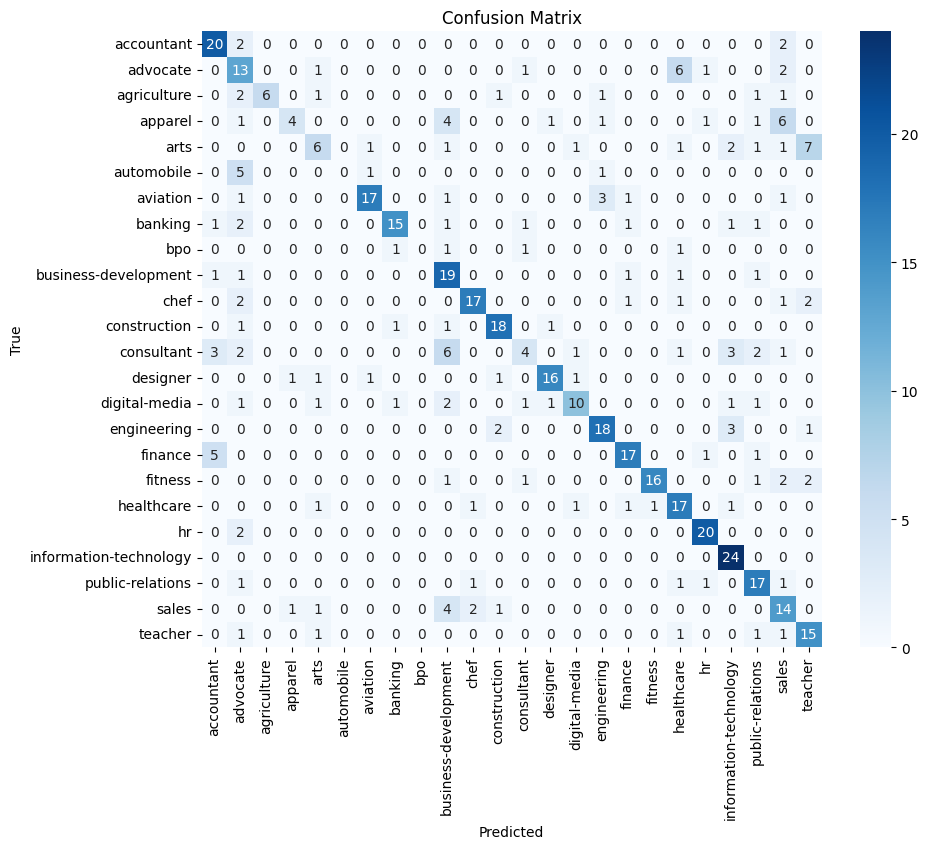

In [136]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


To make the model to be able to make predictions according to given text we need tp dp certain modifications

In [137]:
#processing the resume text
def preprocess_text(resume_text):
  resume_text = resume_text.lower()
  return resume_text


In [138]:
# function to score the resume
def score_resume(resume_text, model, tfidf_vectorizer, label_encoder):
  #process the resume text
  processed_text = preprocess_text(resume_text)

  #transform the resume text into the same TF-IDF format as training data
  resume_tfidf = tfidf_vectorizer.transform([processed_text])

  #get the prediction (predicted category index)
  predicted_index = model.predict(resume_tfidf)

  #get predicted category name
  predicted_category = label_encoder.inverse_transform(predicted_index)[0]

  return predicted_category


In [139]:
# Assuming your TF-IDF vectorizer is fitted during model training

# Ensure that TF-IDF is fitted on the training data (if not already done)
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit the vectorizer on the training data (assuming 'X_train' is your training data)
X_train_tfidf = tfidf.fit_transform(X_train)

# Now you can use it to transform new text, like your resume
def score_resume(resume_text, model, tfidf_vectorizer, label_encoder):
    # Preprocess the resume text (you can add your own preprocessing steps here)
    processed_text = preprocess_text(resume_text)

    # Transform the resume text into the same TF-IDF format as the training data
    resume_tfidf = tfidf_vectorizer.transform([processed_text])

    # Get the prediction (predicted category index)
    predicted_index = model.predict(resume_tfidf)

    # Get predicted category name
    predicted_category = label_encoder.inverse_transform(predicted_index)[0]

    return predicted_category

# Assuming 'resume_text' is the new resume text you want to score
resume_text = "Versatile professional with experience in managing office operations, scheduling executive meetings, and overseeing recruitment drives. Assisted in drafting training materials and helped coordinate orientation sessions for new employees. Also maintained vendor relationships and handled inventory procurement. Familiar with employee databases and basic payroll processing. Played a role in event planning for both employee engagement and external client meetings. Interested in organizational development and streamlining communication between teams."

# Call the function to get the predicted category
predicted_category = score_resume(resume_text, model, tfidf, label_encoder)

# Output the predicted category
print(f"The predicted category for the resume is: {predicted_category}")


The predicted category for the resume is: hr


In [140]:
df

,ID,Resume_str,Category,Category_encoded
0,16852973,hr administrator marketing associate hr admini...,hr,19
1,22323967,"hr specialist, us hr operations summary versat...",hr,19
2,33176873,hr director summary over 20 years experience i...,hr,19
3,27018550,"hr specialist summary dedicated, driven, and d...",hr,19
4,17812897,hr manager skill highlights hr skills hr depar...,hr,19
...,...,...,...,...
2479,99416532,rank sgt e 5 non commissioned officer in charg...,aviation,6
2480,24589765,"government relations, communications and organ...",aviation,6
2481,31605080,geek squad agent professional profile it suppo...,aviation,6
2482,21190805,program director office manager summary highly...,aviation,6


In [141]:
scoring_criteria = {
    "information_technology": [
        "programming", "software development", "cloud computing", "python", "java", "c++",
        "sql", "networking", "cybersecurity", "database", "system administration", "linux",
        "devops", "virtualization", "it support", "agile", "scrum", "it infrastructure","react","git"
    ],
    "business_development": [
        "sales", "marketing", "lead generation", "negotiation", "crm", "client relations",
        "pitch", "market research", "b2b", "b2c", "revenue", "prospecting", "pipeline",
        "target", "business strategy", "growth"
    ],
    "advocate": [
        "law", "legal", "advocacy", "court", "litigation", "legal research", "contracts",
        "negotiation", "client consultation", "civil law", "criminal law", "legal writing",
        "mediation", "rights", "dispute resolution"
    ],
    "chef": [
        "cooking", "culinary", "food preparation", "menu planning", "kitchen management",
        "recipe development", "food safety", "restaurant", "baking", "pastry", "presentation",
        "ingredient sourcing", "team leadership", "food service"
    ],
    "engineering": [
        "mechanical", "civil", "electrical", "structural", "design", "project management",
        "autocad", "construction", "sustainability", "engineering solutions", "manufacturing",
        "systems", "quality control", "production", "materials", "innovative design"
    ],
    "accountant": [
        "finance", "accounting", "bookkeeping", "audit", "taxation", "ledger", "accounts payable",
        "accounts receivable", "financial reporting", "balance sheet", "financial statements",
        "reconciliation", "quickbooks", "excel", "tax returns", "payroll"
    ],
    "finance": [
        "investment", "portfolio management", "accounting", "banking", "financial analysis",
        "risk management", "financial planning", "tax planning", "budgeting", "valuation",
        "capital markets", "debt", "equity", "fundraising", "wealth management"
    ],
    "fitness": [
        "personal training", "exercise", "health", "nutrition", "workout plans", "strength training",
        "wellness", "cardio", "fitness assessments", "weight loss", "muscle building", "group fitness",
        "yoga", "rehabilitation", "endurance"
    ],
    "aviation": [
        "aircraft", "pilot", "faa", "airlines", "flight", "aviation", "navigation", "crew",
        "cockpit", "runway", "altitude", "takeoff", "landing", "air traffic", "aerospace",
        "maintenance", "mechanics", "turbulence"
    ],
    "sales": [
        "client relations", "sales strategy", "customer service", "negotiation", "product knowledge",
        "closing deals", "b2b", "b2c", "lead generation", "sales targets", "market research",
        "account management", "salesforce", "crm"
    ],
    "banking": [
        "finance", "loan", "mortgage", "bank operations", "customer service", "investment",
        "risk management", "banking regulations", "credit", "debt", "financial services",
        "account management", "capital markets", "atm", "branch operations"
    ],
    "healthcare": [
        "patient care", "healthcare", "medical", "hospital", "nursing", "doctor", "treatment",
        "clinical", "pharmacy", "diagnosis", "therapy", "medication", "medical records",
        "health services", "emergency care", "hospital administration"
    ],
    "consultant": [
        "consulting", "strategy", "business solutions", "market research", "project management",
        "analysis", "client relations", "process optimization", "problem solving", "business development",
        "change management", "industry expertise", "recommendations"
    ],
    "construction": [
        "project management", "blueprints", "building", "contractor", "construction sites",
        "safety", "quality control", "civil engineering", "materials", "equipment", "construction management",
        "sustainability", "architecture", "site preparation"
    ],
    "public_relations": [
        "media relations", "public relations", "press releases", "brand management", "communications",
        "event planning", "crisis management", "social media", "content creation", "advertising",
        "journalism", "reputation management", "stakeholder engagement"
    ],
    "hr": [
        "recruitment", "employee relations", "onboarding", "payroll", "benefits", "training",
        "talent acquisition", "hr policies", "compliance", "performance review", "conflict resolution",
        "hrms", "interviewing", "leave management", "organizational behavior"
    ],
    "designer": [
        "graphic design", "illustration", "web design", "ux/ui", "photoshop", "illustrator",
        "branding", "typography", "creative", "motion graphics", "portfolio", "design trends",
        "user experience", "user interface"
    ],
    "arts": [
        "creative", "design", "illustration", "drawing", "painting", "portfolio", "exhibition",
        "visuals", "sketching", "color theory", "aesthetics", "media arts", "animation",
        "fine arts", "craft", "installations", "storytelling"
    ],
    "teacher": [
        "education", "curriculum development", "teaching", "student engagement", "classroom management",
        "lesson plans", "assessment", "pedagogy", "online learning", "subject matter expertise",
        "child development", "school administration", "teaching strategies"
    ],
    "apparel": [
        "fashion", "design", "clothing", "textiles", "garment production", "merchandising",
        "fashion trends", "pattern making", "apparel manufacturing", "styling", "retail", "branding",
        "fabric sourcing", "clothing sales"
    ],
    "digital_media": [
        "social media", "content creation", "video editing", "digital marketing", "advertising",
        "seo", "sem", "web analytics", "blogging", "brand strategy", "campaign management",
        "email marketing", "graphics", "multimedia"
    ],
    "agriculture": [
        "farming", "crop management", "livestock", "agronomy", "irrigation", "sustainability",
        "soil science", "farm machinery", "organic farming", "agriculture research", "plant breeding",
        "agriculture technology"
    ],
    "automobile": [
        "automotive", "mechanics", "car repair", "engine", "vehicle maintenance", "automobile design",
        "vehicle diagnostics", "assembly", "automobile engineering", "motor", "auto parts", "safety",
        "fuel efficiency"
    ],
    "bpo": [
        "customer service", "call center", "outsourcing", "technical support", "data entry",
        "telemarketing", "back-office operations", "lead generation", "client support", "quality assurance",
        "process improvement", "team management", "workflow automation"
    ],
    "lawyer": [
        "law", "attorney", "litigation", "court", "legal research", "contracts",
        "negotiation", "client consultation", "civil law", "criminal law", "legal writing",
        "dispute resolution", "mediation", "advocacy", "trial", "legal compliance", "defense",
        "prosecution", "judgment", "testimony", "case law"
    ]
}

In [142]:
# Define the scoring function
def score_resume(resume_str, scoring_criteria):
    scores = {}

    # Loop through each department and calculate the score based on keywords present in the resume
    for department, keywords in scoring_criteria.items():
        score = 0
        total_keywords = len(keywords)  # Total number of keywords in the department

        # Count the number of keywords matched in the resume
        for keyword in keywords:
            if keyword in resume_str:
                score += 1

        # Ensure the score doesn't exceed 10
        scores[department] = min(score, 10)

    return scores  # Return the dictionary of scores for each department

# Example usage
resume_str = "I am an experienced software developer with a strong background in developing web applications using JavaScript, HTML, and CSS. I have worked extensively with React and Node.js, building scalable and efficient applications. My expertise includes REST APIs, database management with MongoDB, and ensuring cross-platform compatibility. I am highly proficient in debugging and troubleshooting issues, ensuring code quality through unit testing and adhering to best practices. I am also familiar with version control systems like Git and GitHub, enabling efficient collaboration in team environments."


# Calculate the score for a given resume
scores = score_resume(resume_str.lower(), scoring_criteria)

# Find the department with the highest score
predicted_category = max(scores, key=scores.get)
predicted_score = scores[predicted_category]

# Display the results
print(f"The predicted category for the resume is: {predicted_category}")
print(f"The score for this particular resume is: {predicted_score}")


The predicted category for the resume is: information_technology
The score for this particular resume is: 4


In [143]:
df

,ID,Resume_str,Category,Category_encoded
0,16852973,hr administrator marketing associate hr admini...,hr,19
1,22323967,"hr specialist, us hr operations summary versat...",hr,19
2,33176873,hr director summary over 20 years experience i...,hr,19
3,27018550,"hr specialist summary dedicated, driven, and d...",hr,19
4,17812897,hr manager skill highlights hr skills hr depar...,hr,19
...,...,...,...,...
2479,99416532,rank sgt e 5 non commissioned officer in charg...,aviation,6
2480,24589765,"government relations, communications and organ...",aviation,6
2481,31605080,geek squad agent professional profile it suppo...,aviation,6
2482,21190805,program director office manager summary highly...,aviation,6


In [144]:
import pandas as pd
import spacy
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

tqdm.pandas()

# Function to lemmatize each resume
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# Apply to the Resume_str column and store in Lem_str
df['Lem_str'] = df['Resume_str'].progress_apply(lemmatize_text)

# Preview the updated DataFrame
print(df[['Resume_str', 'Category', 'Lem_str']].head())


100%|██████████| 2484/2484 [06:24<00:00,  6.45it/s]

                                          Resume_str Category  \
0  hr administrator marketing associate hr admini...       hr   
1  hr specialist, us hr operations summary versat...       hr   
2  hr director summary over 20 years experience i...       hr   
3  hr specialist summary dedicated, driven, and d...       hr   
4  hr manager skill highlights hr skills hr depar...       hr   

                                             Lem_str  
0  hr administrator marketing associate hr admini...  
1  hr specialist , us hr operation summary versat...  
2  hr director summary over 20 year experience in...  
3  hr specialist summary dedicate , driven , and ...  
4  hr manager skill highlight hr skill hr departm...  


In [145]:
df

,ID,Resume_str,Category,Category_encoded,Lem_str
0,16852973,hr administrator marketing associate hr admini...,hr,19,hr administrator marketing associate hr admini...
1,22323967,"hr specialist, us hr operations summary versat...",hr,19,"hr specialist , us hr operation summary versat..."
2,33176873,hr director summary over 20 years experience i...,hr,19,hr director summary over 20 year experience in...
3,27018550,"hr specialist summary dedicated, driven, and d...",hr,19,"hr specialist summary dedicate , driven , and ..."
4,17812897,hr manager skill highlights hr skills hr depar...,hr,19,hr manager skill highlight hr skill hr departm...
...,...,...,...,...,...
2479,99416532,rank sgt e 5 non commissioned officer in charg...,aviation,6,rank sgt e 5 non commission officer in charge ...
2480,24589765,"government relations, communications and organ...",aviation,6,"government relation , communication and organi..."
2481,31605080,geek squad agent professional profile it suppo...,aviation,6,geek squad agent professional profile it suppo...
2482,21190805,program director office manager summary highly...,aviation,6,program director office manager summary highly...


In [146]:
# Assuming your DataFrame is called df and the label column is 'Category'
df = df[~df['Category'].isin(['bpo', 'automobile'])]

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['Lem_str'])

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


                        precision    recall  f1-score   support

            accountant       0.81      0.88      0.85        34
              advocate       0.65      0.57      0.61        30
           agriculture       0.67      0.17      0.27        12
               apparel       0.67      0.40      0.50        20
                  arts       0.39      0.39      0.39        18
              aviation       0.70      0.80      0.74        20
               banking       0.73      0.64      0.68        25
  business-development       0.48      0.65      0.56        23
                  chef       0.83      0.79      0.81        19
          construction       0.82      0.88      0.85        16
            consultant       0.50      0.19      0.27        16
              designer       0.75      0.75      0.75        24
         digital-media       0.71      0.50      0.59        24
           engineering       0.61      0.70      0.65        20
               finance       0.87      

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)


In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train it
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


                        precision    recall  f1-score   support

            accountant       0.80      0.94      0.86        34
              advocate       1.00      0.80      0.89        30
           agriculture       1.00      0.50      0.67        12
               apparel       0.73      0.55      0.63        20
                  arts       0.40      0.11      0.17        18
              aviation       0.75      0.90      0.82        20
               banking       0.86      0.76      0.81        25
  business-development       0.41      0.39      0.40        23
                  chef       0.83      0.79      0.81        19
          construction       0.81      0.81      0.81        16
            consultant       0.60      0.56      0.58        16
              designer       0.77      0.83      0.80        24
         digital-media       0.70      0.58      0.64        24
           engineering       0.68      0.85      0.76        20
               finance       0.78      

In [151]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'resume_classifier_model2.pkl')


['resume_classifier_model2.pkl']

In [152]:
joblib.dump(vectorizer, 'tfidf_vectorizer2.pkl')


['tfidf_vectorizer2.pkl']

In [153]:
def predict_resume_category(resume_text):
    # Load model and vectorizer
    model = joblib.load('resume_classifier_model2.pkl')
    vectorizer = joblib.load('tfidf_vectorizer2.pkl')

    # Preprocess and transform input
    text_vector = vectorizer.transform([resume_text])
    prediction = model.predict(text_vector)

    return prediction[0]


In [154]:
test_resume = "Sales professional experienced in cold calling, closing deals, and managing sales pipelines. Proven success in hitting monthly targets and increasing customer acquisition through tailored product pitches."
predicted_category = predict_resume_category(test_resume)
print("Predicted Category:", predicted_category)


Predicted Category: business-development


In [155]:
# Get predicted probabilities
pred_probs = model.predict_proba(vectorizer.transform([test_resume]))

# Print the probabilities for each class
for label, prob in zip(model.classes_, pred_probs[0]):
    print(f"{label}: {prob:.2f}")

accountant: 0.03
advocate: 0.05
agriculture: 0.03
apparel: 0.05
arts: 0.05
aviation: 0.06
banking: 0.06
business-development: 0.06
chef: 0.05
construction: 0.05
consultant: 0.07
designer: 0.06
digital-media: 0.04
engineering: 0.06
finance: 0.03
fitness: 0.06
healthcare: 0.04
hr: 0.02
information-technology: 0.03
public-relations: 0.02
sales: 0.06
teacher: 0.04


In [158]:
from google.colab import files
files.download('resume_classifier_model2.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>